In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/USER/Downloads/CSUSHPISA (1).csv")

In [3]:
df.shape

(245, 2)

In [4]:
df.head(4)

,DATE,CSUSHPISA
0,2002-01-01,117.143
1,2002-02-01,117.844
2,2002-03-01,118.687
3,2002-04-01,119.611


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       245 non-null    object 
 1   CSUSHPISA  245 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [6]:
df.isnull().sum()

DATE         0
CSUSHPISA    0
dtype: int64

## there is no null value in this data

# Time Series Analysis

In [33]:
from datetime import datetime

In [36]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [37]:
df = df.set_index('DATE',drop = True)

## EDA

<AxesSubplot:xlabel='DATE'>

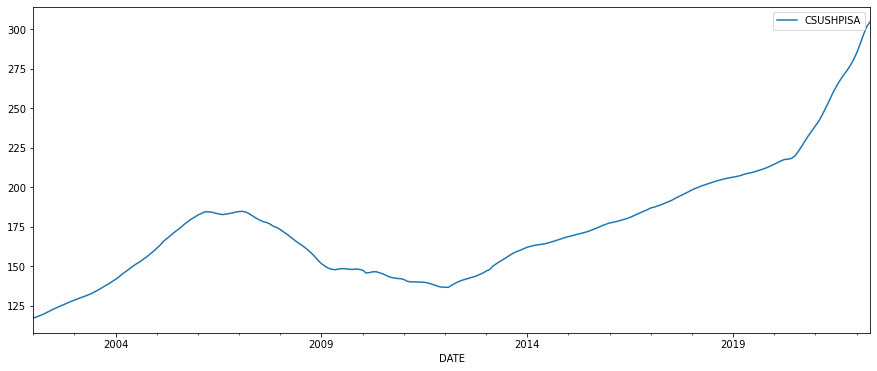

In [38]:
df.plot(figsize = (15,6))

## After 2006 it went down from the increment of 2002

<AxesSubplot:xlabel='DATE'>

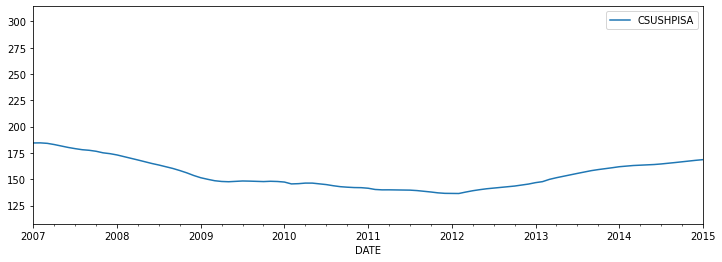

In [39]:
df.plot(xlim = ['2007-01-01','2015-01-01'],figsize =(12,4))

## After 2012 it started rise again and then it didn't fall down. After 6 years the price got up

In [40]:
df.resample(rule = 'A').agg(['min','max'])  ## resampling

CSUSHPISA         
                 min      max
DATE                         
2002-12-31   117.143  127.622
2003-12-31   128.461  140.180
2004-12-31   141.646  159.330
2005-12-31   161.288  180.910
2006-12-31   182.320  184.364
2007-12-31   174.341  184.599
2008-12-31   153.618  173.133
2009-12-31   147.696  151.504
2010-12-31   142.061  147.395
2011-12-31   136.676  141.526
2012-12-31   136.529  145.501
2013-12-31   146.835  160.997
2014-12-31   161.948  168.058
2015-12-31   168.663  176.553
2016-12-31   177.302  185.690
2017-12-31   186.793  197.044
2018-12-31   198.201  205.867
2019-12-31   206.266  213.434
2020-12-31   214.490  235.700
2021-12-31   238.784  280.190
2022-12-31   284.767  304.831

<AxesSubplot:xlabel='DATE'>

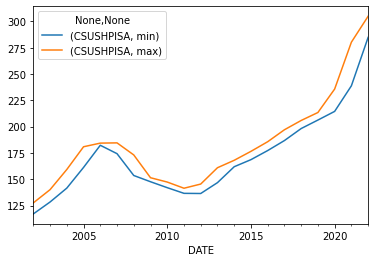

In [41]:
df.resample(rule = 'A').agg(['min','max']).plot()

## This is the yearly information we got with min and max csushpisa

In [42]:
df.resample(rule = 'QS').agg(['min','max'])

CSUSHPISA         
                 min      max
DATE                         
2002-01-01   117.143  118.687
2002-04-01   119.611  121.813
2002-07-01   122.888  124.780
2002-10-01   125.734  127.622
2003-01-01   128.461  130.148
...              ...      ...
2021-04-01   250.094  259.249
2021-07-01   263.349  270.258
2021-10-01   273.154  280.190
2022-01-01   284.767  296.496
2022-04-01   301.704  304.831

[82 rows x 2 columns]

<AxesSubplot:xlabel='DATE'>

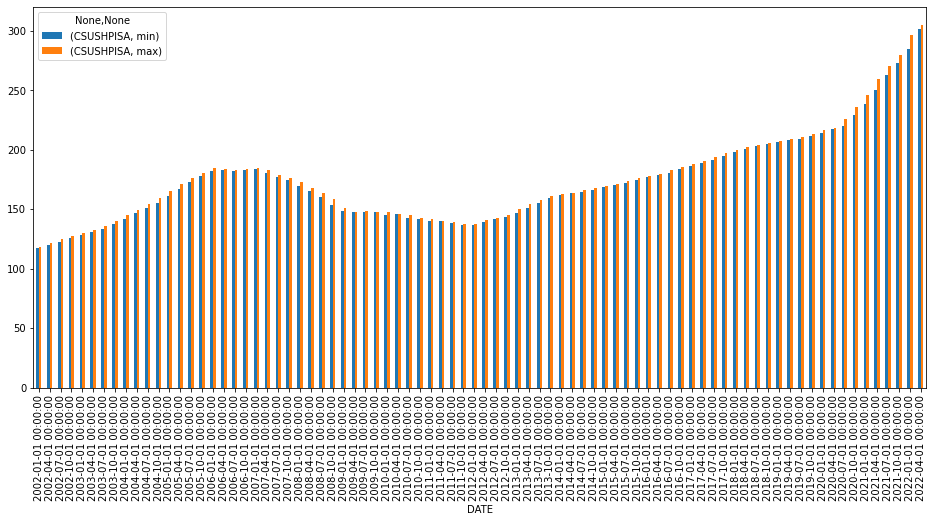

In [43]:
df.resample(rule = 'QS').agg(['min','max']).plot(kind='bar',figsize=(16,7))

## Maximum rise is in 2022

In [44]:
df.loc['2006-01-01':'2012-01-01'].mean()

CSUSHPISA    159.663411
dtype: float64

 ## This is the average CSUSHPISA during the fall

In [45]:
df.loc['2012-01-01':'2021-01-01'].mean()

CSUSHPISA    182.615477
dtype: float64

## This was the average CSUSHPISA after 2012 to 2021

In [46]:
df.loc['2022-01-01':].mean()

CSUSHPISA    295.6338
dtype: float64

## average CSUSHPISA after 2022 which gives the maximum hike

In [47]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose ,STL
plt.rcParams["figure.figsize"] = (13,6)

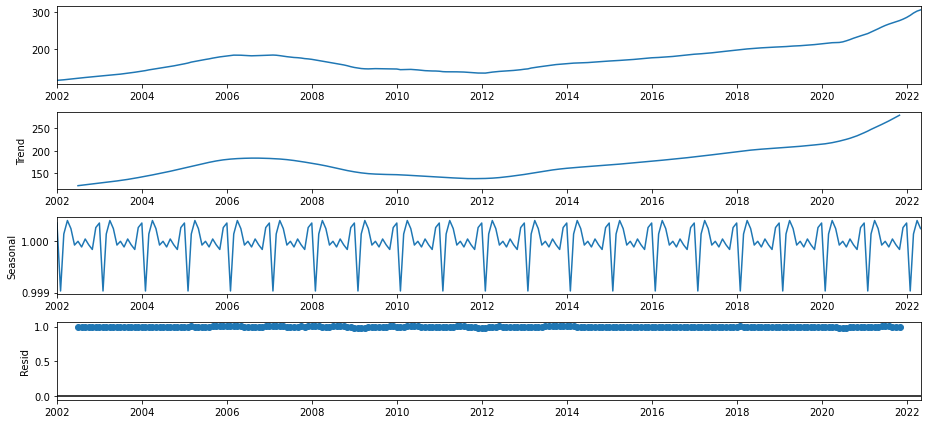

In [48]:
df_decomposed = seasonal_decompose(df,model='multiplicative')
df_decomposed.plot()
plt.show()

<AxesSubplot:xlabel='DATE'>

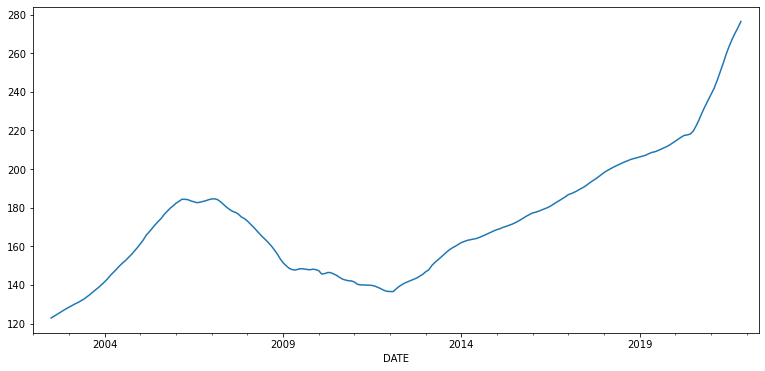

In [49]:

(df_decomposed.trend * df_decomposed.seasonal * df_decomposed.resid).plot()

In [50]:
# moving average
df['rolling 10 days'] = df['CSUSHPISA'].rolling(window=10,min_periods=1).mean() 


In [51]:
df['rolling 30 days'] = df['CSUSHPISA'].rolling(window=30,min_periods=1).mean()

df.plot()

<AxesSubplot:xlabel='DATE'>

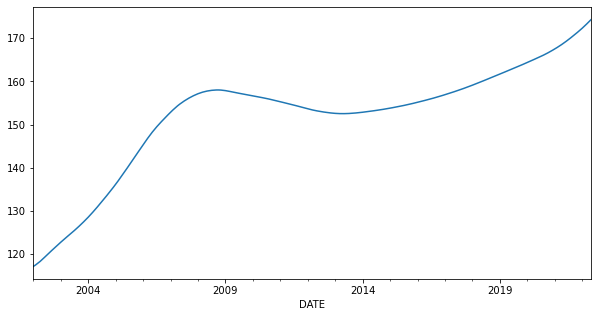

In [52]:
## Cummlative moving average

df['CSUSHPISA'].expanding().mean().plot(figsize=(10,5))

In [53]:
## exponential moving average

df['ema 5 day'] = df['CSUSHPISA'].ewm(span=5).mean()

<AxesSubplot:xlabel='DATE'>

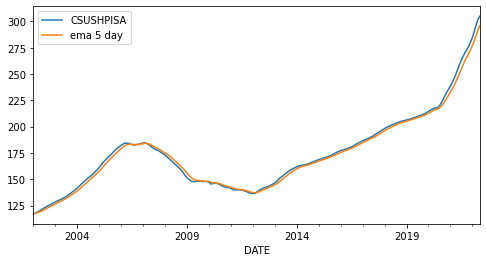

In [54]:
df[['CSUSHPISA','ema 5 day']].plot(figsize=(8,4))

## using dickey fuller test for verification of stationary data

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [57]:
adf_test(df['CSUSHPISA'])

ADF Statistics: 0.5188489283432197
p- value: 0.9854348735711744
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [58]:
## Using Technique Differencing
df['CSUSHPISA First differnce']=df['CSUSHPISA']-df['CSUSHPISA'].shift(1)

In [59]:
df.head()

,CSUSHPISA,rolling 10 days,rolling 30 days,ema 5 day,CSUSHPISA First differnce
DATE,,,,,
2002-01-01,117.143,117.143000,117.143000,117.143000,NaN
2002-02-01,117.844,117.493500,117.493500,117.563600,0.701
2002-03-01,118.687,117.891333,117.891333,118.095737,0.843
2002-04-01,119.611,118.321250,118.321250,118.725154,0.924
2002-05-01,120.724,118.801800,118.801800,119.492483,1.113


In [60]:
adf_test(df['CSUSHPISA First differnce'].dropna())

ADF Statistics: -1.4336329466412578
p- value: 0.5660501264145338
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [61]:
## Using second Time Differencing
df['CSUSHPISA Second Difference']=df['CSUSHPISA First differnce']-df['CSUSHPISA First differnce'].shift(1)

In [62]:
adf_test(df['CSUSHPISA Second Difference'].dropna())

ADF Statistics: -4.02423401567583
p- value: 0.0012887978808391251
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [63]:
### for 12 months 
## Using Technique Differencing
df['CSUSHPISA 12 Difference']=df['CSUSHPISA']-df['CSUSHPISA'].shift(12)

In [64]:
adf_test(df['CSUSHPISA 12 Difference'].dropna())

ADF Statistics: -1.7273440325296299
p- value: 0.41708191489546914
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [65]:
### for 12 months 
## Using second Time Differencing
df['CSUSHPISA second 12 Difference']=df['CSUSHPISA 12 Difference']-df['CSUSHPISA 12 Difference'].shift(12)

In [66]:
adf_test(df['CSUSHPISA second 12 Difference'].dropna())

ADF Statistics: -2.477713351800107
p- value: 0.12099149779397511
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [67]:
### for 12 months 
## Using third Time Differencing
df['CSUSHPISA third 12 Difference']=df['CSUSHPISA second 12 Difference']-df['CSUSHPISA second 12 Difference'].shift(12)

In [68]:
adf_test(df['CSUSHPISA third 12 Difference'].dropna())

ADF Statistics: -4.383875856854096
p- value: 0.0003169554905882495
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


## ACF & PACF Plots

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

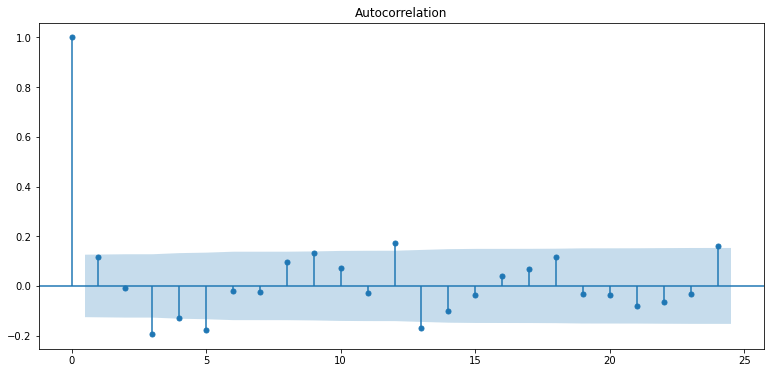

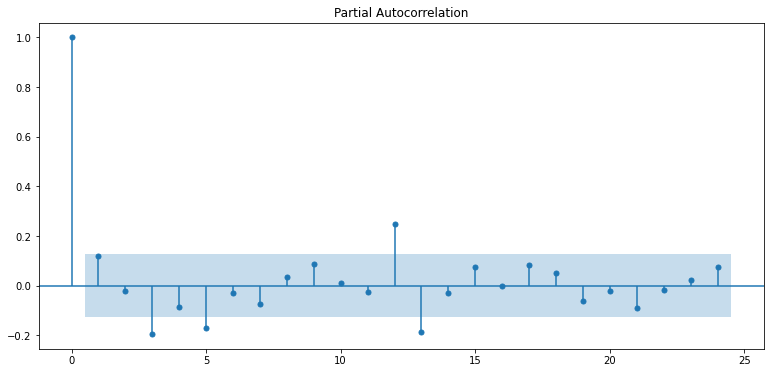

In [70]:
acf = plot_acf(df["CSUSHPISA Second Difference"].dropna())
pcf = plot_pacf(df["CSUSHPISA Second Difference"].dropna())

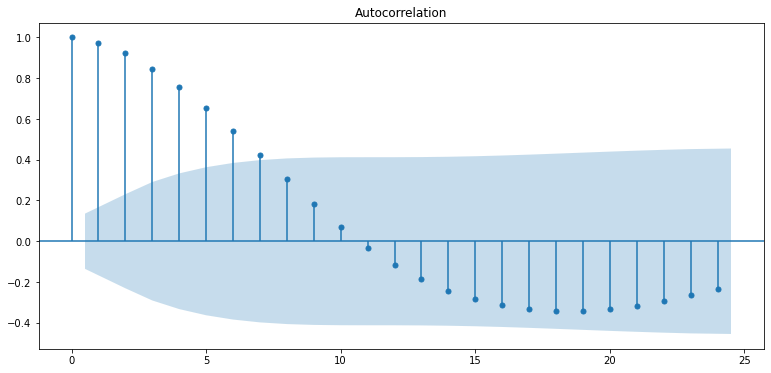

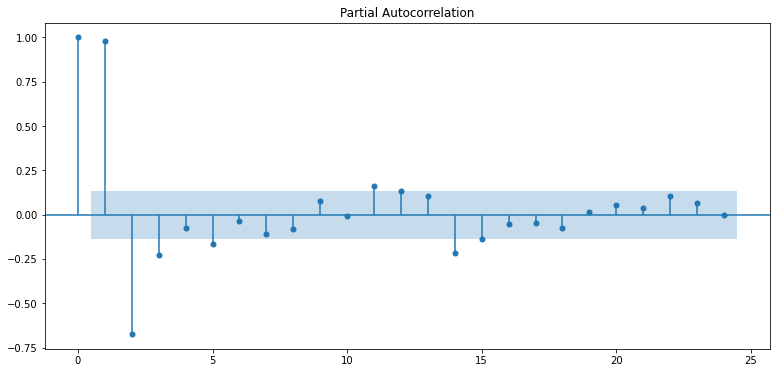

In [71]:
acf12 = plot_acf(df["CSUSHPISA third 12 Difference"].dropna())
pacf12 = plot_pacf(df["CSUSHPISA third 12 Difference"].dropna())

## Model building

In [72]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2015,12,1)
test_dataset_end=datetime(2022,12,1)

In [73]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [74]:
# prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [75]:
## ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [76]:
model_ARIMA=ARIMA(train_data['CSUSHPISA'],order=(9,2,8))

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [77]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\USER\anaconda3\lib\site-packages\stats

In [78]:
model_Arima_fit.summary()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.CSUSHPISA   No. Observations:                  166
Model:                 ARIMA(9, 2, 8)   Log Likelihood                 -70.001
Method:                       css-mle   S.D. of innovations                nan
Date:                Mon, 29 Aug 2022   AIC                            178.001
Time:                        11:54:10   BIC                            237.129
Sample:                    03-01-2002   HQIC                           202.002
                         - 12-01-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0130        nan        nan        nan         nan         nan
ar.L1.D2.CSUSHPISA     0.4750   1.08e-05   4.42e+04      0.000       0.475       0.475
ar.L2.D2.CSUSHPISA    -0.2093        nan        nan        nan         nan         nan
ar.L3.D2.CSUSHPISA     0.6890        nan        nan        nan         nan         nan
ar.L4.D2.CSUSHPISA     0.0042        nan        nan        nan         nan         nan
ar.L5.D2.CSUSHPISA    -0.7856   7.54e-07  -1.04e+06      0.000      -0.786      -0.786
ar.L6.D2.CSUSHPISA     0.2690   1.24e-06   2.16e+05      0.000       0.269       0.269
ar.L7.D2.CSUSHPISA    -0.5212        nan        nan        nan         nan         nan
ar.L8.D2.CSUSHPISA     0.8522   4.28e-07   1.99e+06      0.000       0.852       0.852
ar.L9.D2.CSUSHPISA     0.0589    8.7e-07   6.78e+04      0.000       0.059       0.059
ma.L1.D2.CSUSHPISA    -0.5528      0.068     -8.086      0.000      -0.687      -0.419
ma.L2.D2.CSUSHPISA     0.2367      0.063      3.776      0.000       0.114       0.360
ma.L3.D2.CSUSHPISA    -0.8072      0.093     -8.671      0.000      -0.990      -0.625
ma.L4.D2.CSUSHPISA     0.0248      0.058      0.426      0.670      -0.089       0.139
ma.L5.D2.CSUSHPISA     0.8553      0.026     32.402      0.000       0.804       0.907
ma.L6.D2.CSUSHPISA    -0.2898      0.063     -4.590      0.000      -0.414      -0.166
ma.L7.D2.CSUSHPISA     0.4417      0.068      6.498      0.000       0.308       0.575
ma.L8.D2.CSUSHPISA    -0.9086      0.099     -9.145      0.000      -1.103      -0.714
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0407           -0.0000j            1.0407           -0.0000
AR.2            0.8347           -0.5508j            1.0000           -0.0928
AR.3            0.8347           +0.5508j            1.0000            0.0928
AR.4           -1.0000           -0.0000j            1.0000           -0.5000
AR.5           -0.4810           -0.8767j            1.0000           -0.3299
AR.6           -0.4810           +0.8767j            1.0000            0.3299
AR.7           -0.0686           -1.0378j            1.0401           -0.2605
AR.8           -0.0686           +1.0378j            1.0401            0.2605
AR.9          -15.0712           -0.0000j           15.0712           -0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.8375           -0.5464j            1.0000           -0.0920
MA.3            0.8375           +0.5464j            1.0000            0.0920
MA.4           -1.0095           -0.0000j            1.0095           -0.5000
MA.5           -0.4732           -0.9039j            1.0203           -0.3268
MA.6      

In [79]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-01-01 00:00:00
2022-05-01 00:00:00


In [80]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['CSUSHPISA']-pred

In [81]:
pred

2016-01-01    0.018578
2016-02-01   -0.395404
2016-03-01   -0.116013
2016-04-01   -0.094058
2016-05-01    0.016020
                ...   
2022-01-01    0.232296
2022-02-01   -0.007714
2022-03-01   -0.046707
2022-04-01   -0.175768
2022-05-01    0.004009
Freq: MS, Length: 77, dtype: float64

In [82]:
residuals

DATE
2016-01-01    177.283422
2016-02-01    178.062404
2016-03-01    178.309013
2016-04-01    178.894058
2016-05-01    179.443980
                 ...    
2022-01-01    284.534704
2022-02-01    290.378714
2022-03-01    296.542707
2022-04-01    301.879768
2022-05-01    304.826991
Length: 77, dtype: float64

<AxesSubplot:ylabel='Density'>

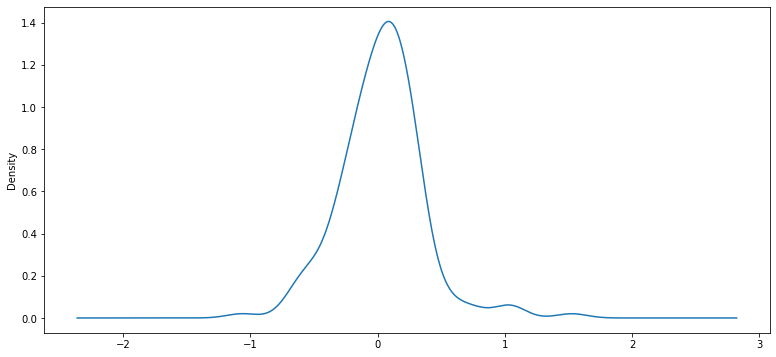

In [83]:
model_Arima_fit.resid.plot(kind='kde')

In [84]:
test_data['Predicted_ARIMA']=pred

<ipython-input-84-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='DATE'>

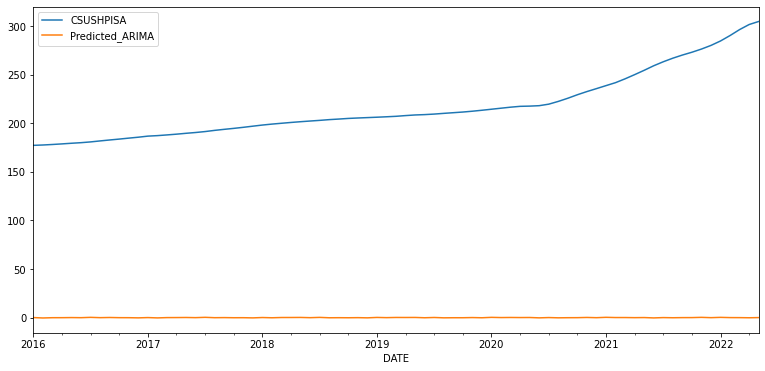

In [85]:
test_data[['CSUSHPISA','Predicted_ARIMA']].plot()

### Using SARIMAX

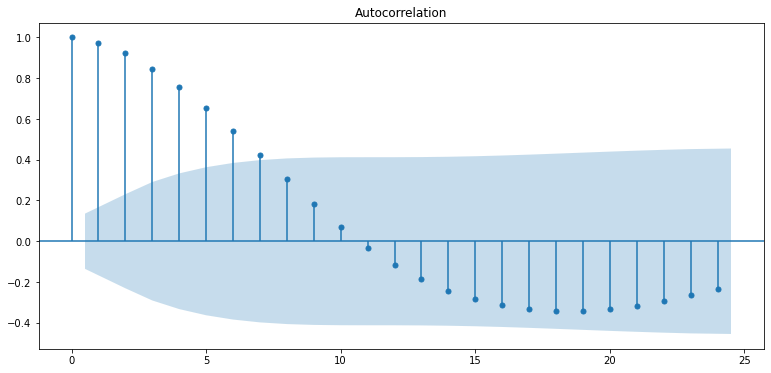

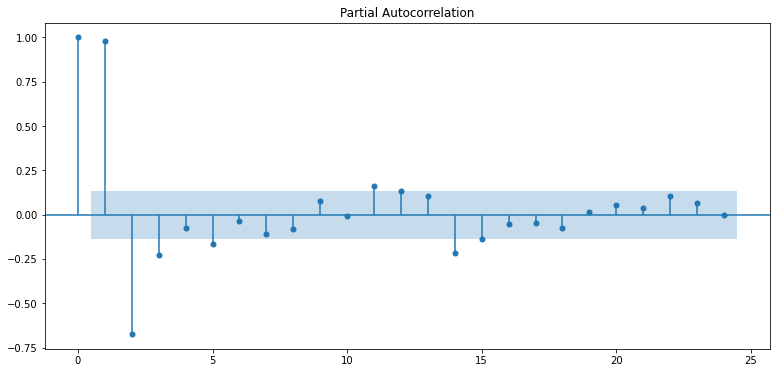

In [86]:
acf12 = plot_acf(df["CSUSHPISA third 12 Difference"].dropna())
pacf12 = plot_pacf(df["CSUSHPISA third 12 Difference"].dropna())

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
model_SARIMA=SARIMAX(train_data['CSUSHPISA'],order=(8,3,8),seasonal_order=(0,0,0,12))

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [89]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  168
Model:               SARIMAX(8, 3, 8)   Log Likelihood                 -58.222
Date:                Mon, 29 Aug 2022   AIC                            150.444
Time:                        11:54:21   BIC                            203.246
Sample:                    01-01-2002   HQIC                           171.878
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5147      0.332     -1.552      0.121      -1.165       0.135
ar.L2         -0.4685      0.312     -1.504      0.133      -1.079       0.142
ar.L3          0.0425      0.135      0.314      0.754      -0.223       0.308
ar.L4         -0.0378      0.134     -0.282      0.778      -0.300       0.225
ar.L5         -0.7880      0.132     -5.947      0.000      -1.048      -0.528
ar.L6         -0.3774      0.306     -1.235      0.217      -0.977       0.222
ar.L7         -0.7292      0.242     -3.015      0.003      -1.203      -0.255
ar.L8         -0.1151      0.091     -1.258      0.208      -0.294       0.064
ma.L1         -0.5062      2.811     -0.180      0.857      -6.015       5.003
ma.L2         -0.0366      1.450     -0.025      0.980      -2.879       2.806
ma.L3         -0.6459      1.369     -0.472      0.637      -3.329       2.037
ma.L4          0.1607      0.561      0.286      0.775      -0.939       1.261
ma.L5          0.8140      0.255      3.196      0.001       0.315       1.313
ma.L6         -0.4225      2.186     -0.193      0.847      -4.708       3.863
ma.L7          0.2583      1.073      0.241      0.810      -1.844       2.361
ma.L8         -0.6214      1.796     -0.346      0.729      -4.141       2.898
sigma2         0.1111      0.312      0.357      0.721      -0.500       0.722
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               138.76
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.94
Prob(H) (two-sided):                  0.36   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-01-01 00:00:00
2022-05-01 00:00:00


In [92]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2016,1,1),end=datetime(2022,5,1))
residuals=test_data['CSUSHPISA']-pred_Sarima

<AxesSubplot:xlabel='DATE'>

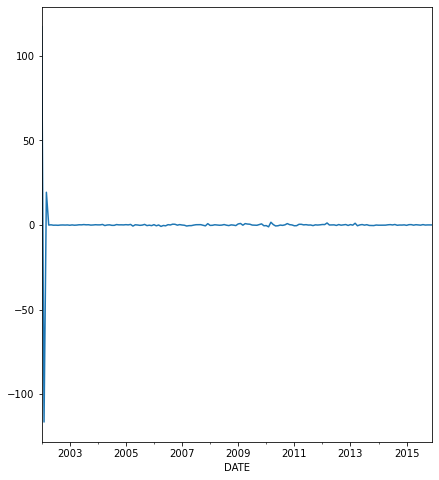

In [93]:
model_SARIMA_fit.resid.plot(figsize=(7,8))

<AxesSubplot:ylabel='Density'>

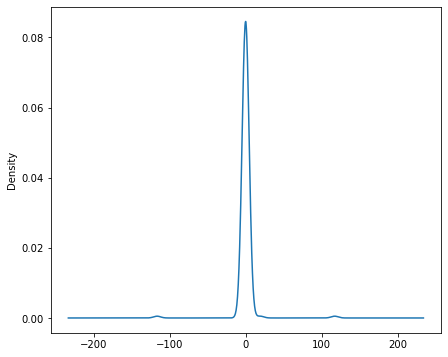

In [94]:
model_SARIMA_fit.resid.plot(kind='kde',figsize=(7,6))

In [95]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-95-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [96]:
test_data

,CSUSHPISA,rolling 10 days,rolling 30 days,ema 5 day,CSUSHPISA First differnce,CSUSHPISA Second Difference,CSUSHPISA 12 Difference,CSUSHPISA second 12 Difference,CSUSHPISA third 12 Difference,Predicted_ARIMA,Predicted_SARIMA
DATE,,,,,,,,,,,
2016-01-01,177.302,173.5966,167.184233,175.678095,0.749,-0.057,8.639,1.924,10.322,0.018578,177.441312
2016-02-01,177.667,174.3321,167.874033,176.341064,0.365,-0.384,8.529,1.921,10.059,-0.395404,178.090683
2016-03-01,178.193,175.0620,168.539333,176.958376,0.526,0.161,8.381,1.662,8.071,-0.116013,178.743511
2016-04-01,178.800,175.7983,169.191100,177.572251,0.607,0.081,8.488,1.576,6.543,-0.094058,179.405314
2016-05-01,179.460,176.5312,169.837267,178.201500,0.660,0.053,8.566,1.338,4.922,0.016020,180.124351
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,284.767,267.9074,237.662067,277.024745,4.577,0.816,45.983,21.689,5.619,0.232296,234.895389
2022-02-01,290.371,271.9351,240.333400,281.473497,5.604,1.027,48.526,22.230,4.771,-0.007714,235.805216
2022-03-01,296.496,276.1291,243.186233,286.480998,6.125,0.521,50.700,21.506,1.712,-0.046707,236.676075


<AxesSubplot:xlabel='DATE'>

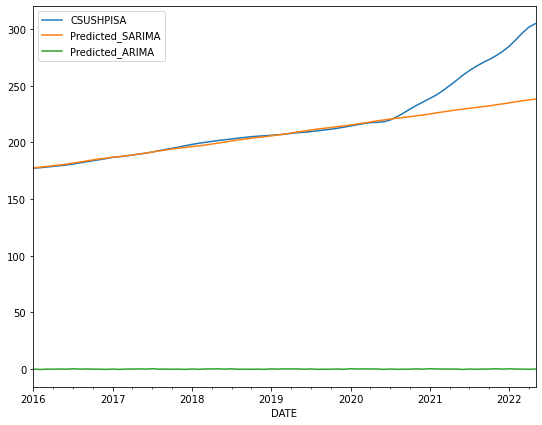

In [97]:
test_data[['CSUSHPISA','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize = (9,7))

### Sarimax is working better than far better than arima because it is a seasonal data

## Performance metrics 

In [99]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_data['CSUSHPISA'], pred_Sarima))

394.93571952276494


In [103]:
## RMSE
np.sqrt(mean_squared_error(test_data['CSUSHPISA'], pred_Sarima))

19.872989697646524

In [100]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test_data['CSUSHPISA'], pred_Sarima))

9.657588630602984
